In [5]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from nest import overlap_try as overlap
from nest import detectors   
from astropy.cosmology import Planck15

cosmo = Planck15
H0 =  cosmo.H0.to('1/s').value

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

In [129]:
def Omega_beta(f, fref, snr, Tobs, beta, orf, Ni, Nj):
    Tobs = Tobs * 365 * 24 * 3600
    integrand = lambda f: ((f/fref)**(2*beta)) * (orf**2) / (f**6) / (Ni) / (Nj)
    integral = np.trapz(integrand(f), f)
    return 10 * (np.pi**2) * snr /(3*H0**2) / (integral**(0.5))/ np.sqrt(2* Tobs)

def Omega_GW(f, fref, snr, Tobs, beta, orf, Ni, Nj):
    return Omega_beta(f, fref, snr, Tobs, beta, orf, Ni, Nj) * ((f/fref)**(beta))

def all_Omega_GW(f, fref, snr, Tobs, beta_min, beta_max, orf, Ni, Nj):
    beta = np.linspace(beta_min, beta_max, 100)
    Omega = []
    for i in range(len(beta)):
        Omega.append(Omega_GW(f, fref, snr, Tobs, beta[i], orf, Ni, Nj))
        
    return beta, np.array(Omega)

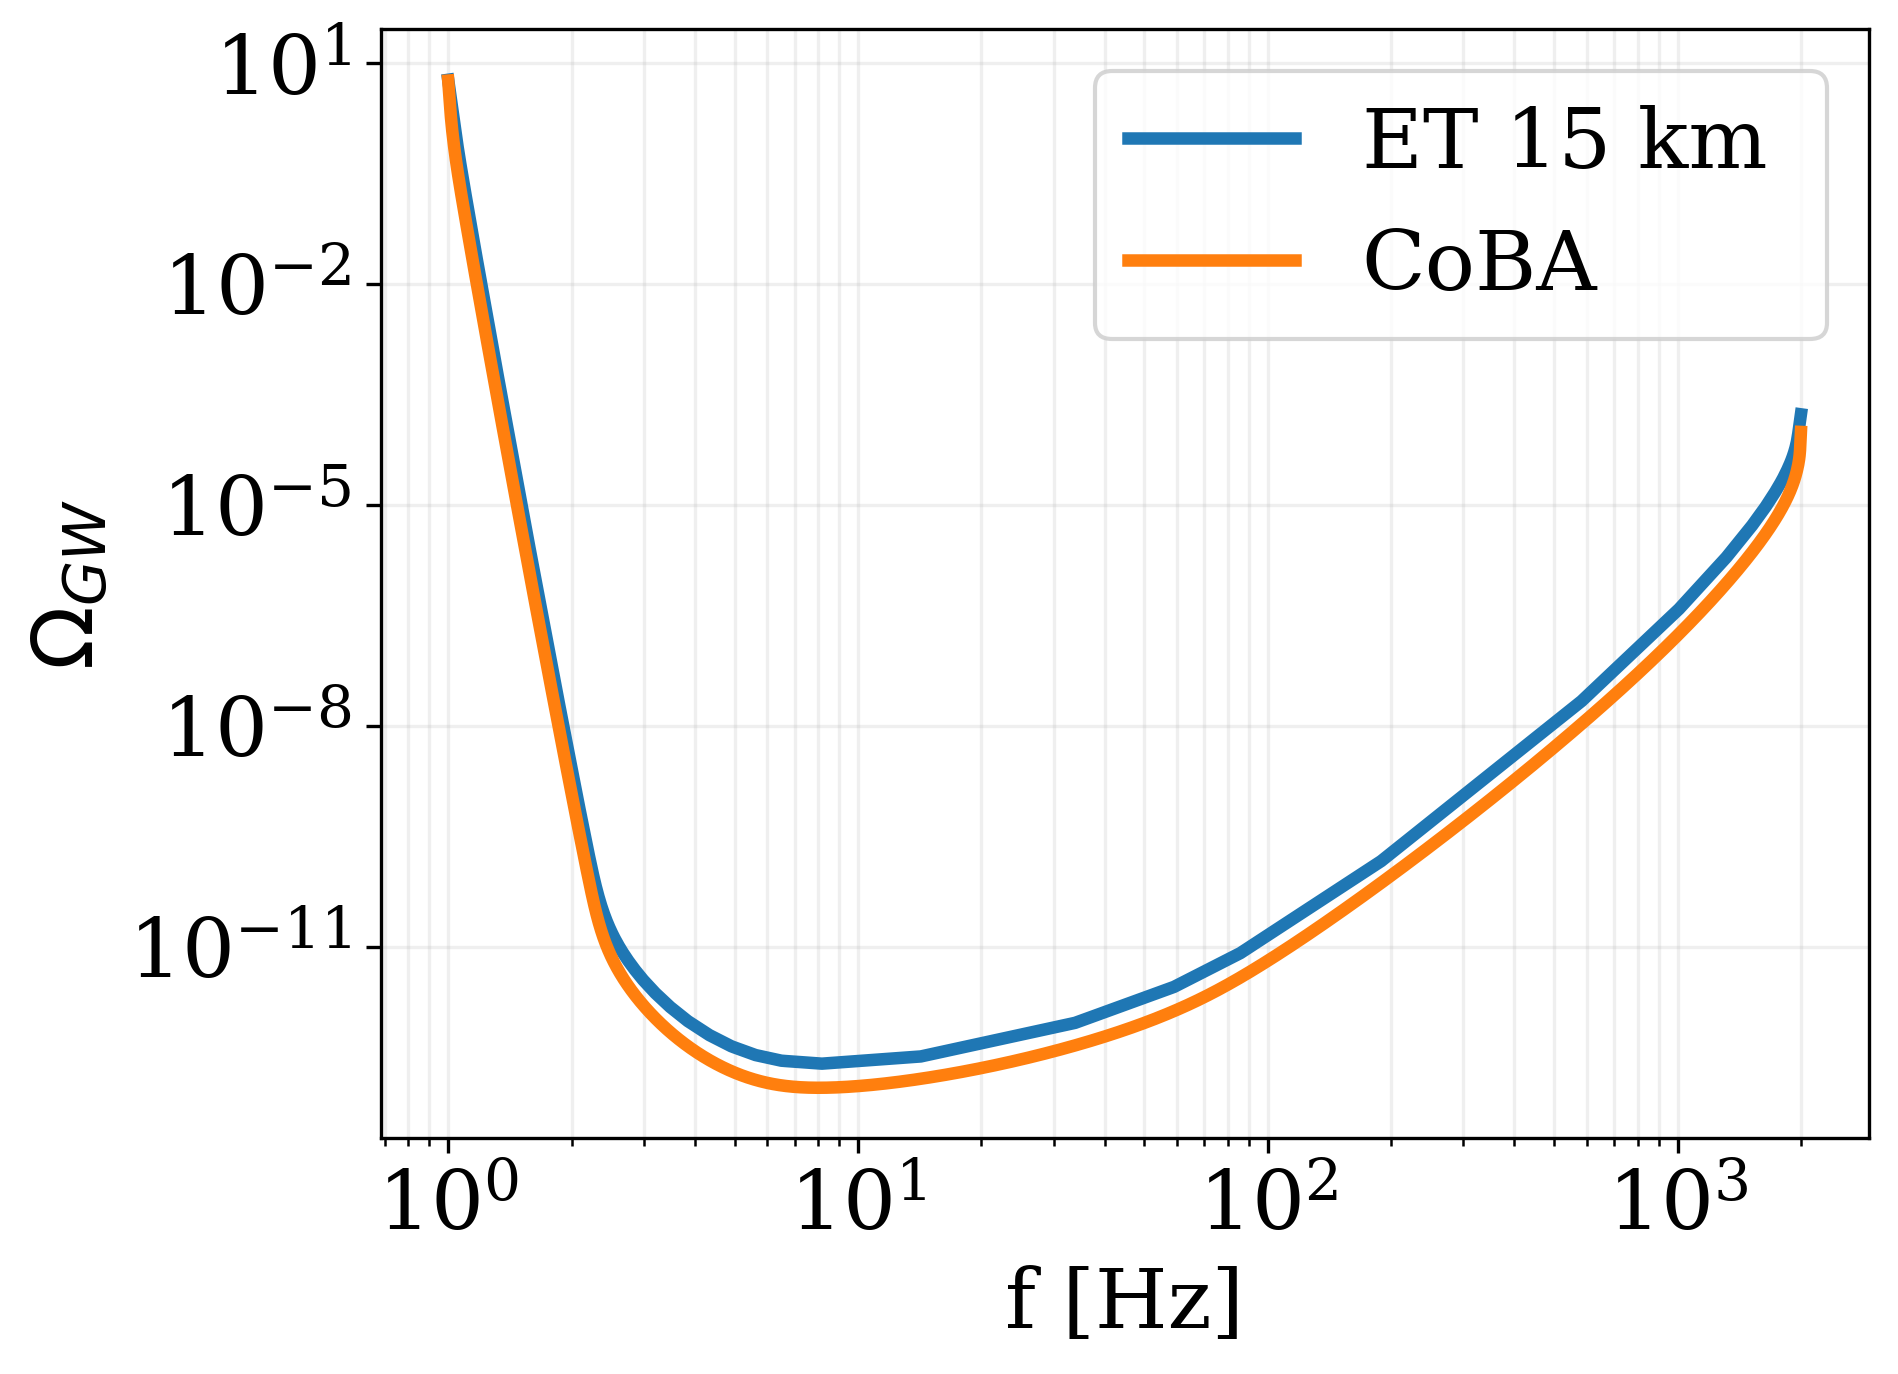

In [132]:
beta_min = -40
beta_max = 40
fref = 100
snr = 1
Tobs = 1

f = np.logspace(0, np.log10(2000), 1000)
orf= overlap.overlap('ET L1', 'ET L2', f, 0, 't', shift_angle=np.deg2rad(0) )
f_ref, psd_hf, psd_lf, psd_tot = np.loadtxt('psd/18213_ET15kmcolumns.txt', unpack=True)

Ni = np.interp(f, f_ref,psd_tot)
Nj = np.interp(f, f_ref,psd_tot)

beta, Omega = all_Omega_GW(f, fref, snr, Tobs, beta_min, beta_max, orf, Ni, Nj)

pls = np.zeros(len(f))

for i in range(len(f)):
    pls[i] = np.max(Omega[:,i])


f_CoBA, PLS_CoBA = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L0deg_15km_HFLFcryo.txt', unpack=True)


# for i in range(len(beta)):
#     plt.loglog(f, Omega_GW(f, Pn, Pn, orf_ET, beta[i], fref, snr, Tobs) , alpha=0.01, color='black')
plt.loglog(f, pls, label=r'ET 15 km ')
plt.loglog(f_CoBA, PLS_CoBA, label='CoBA')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')
plt.legend()
# plt.ylim(1e-13, 1e2)

* ET $\Delta$

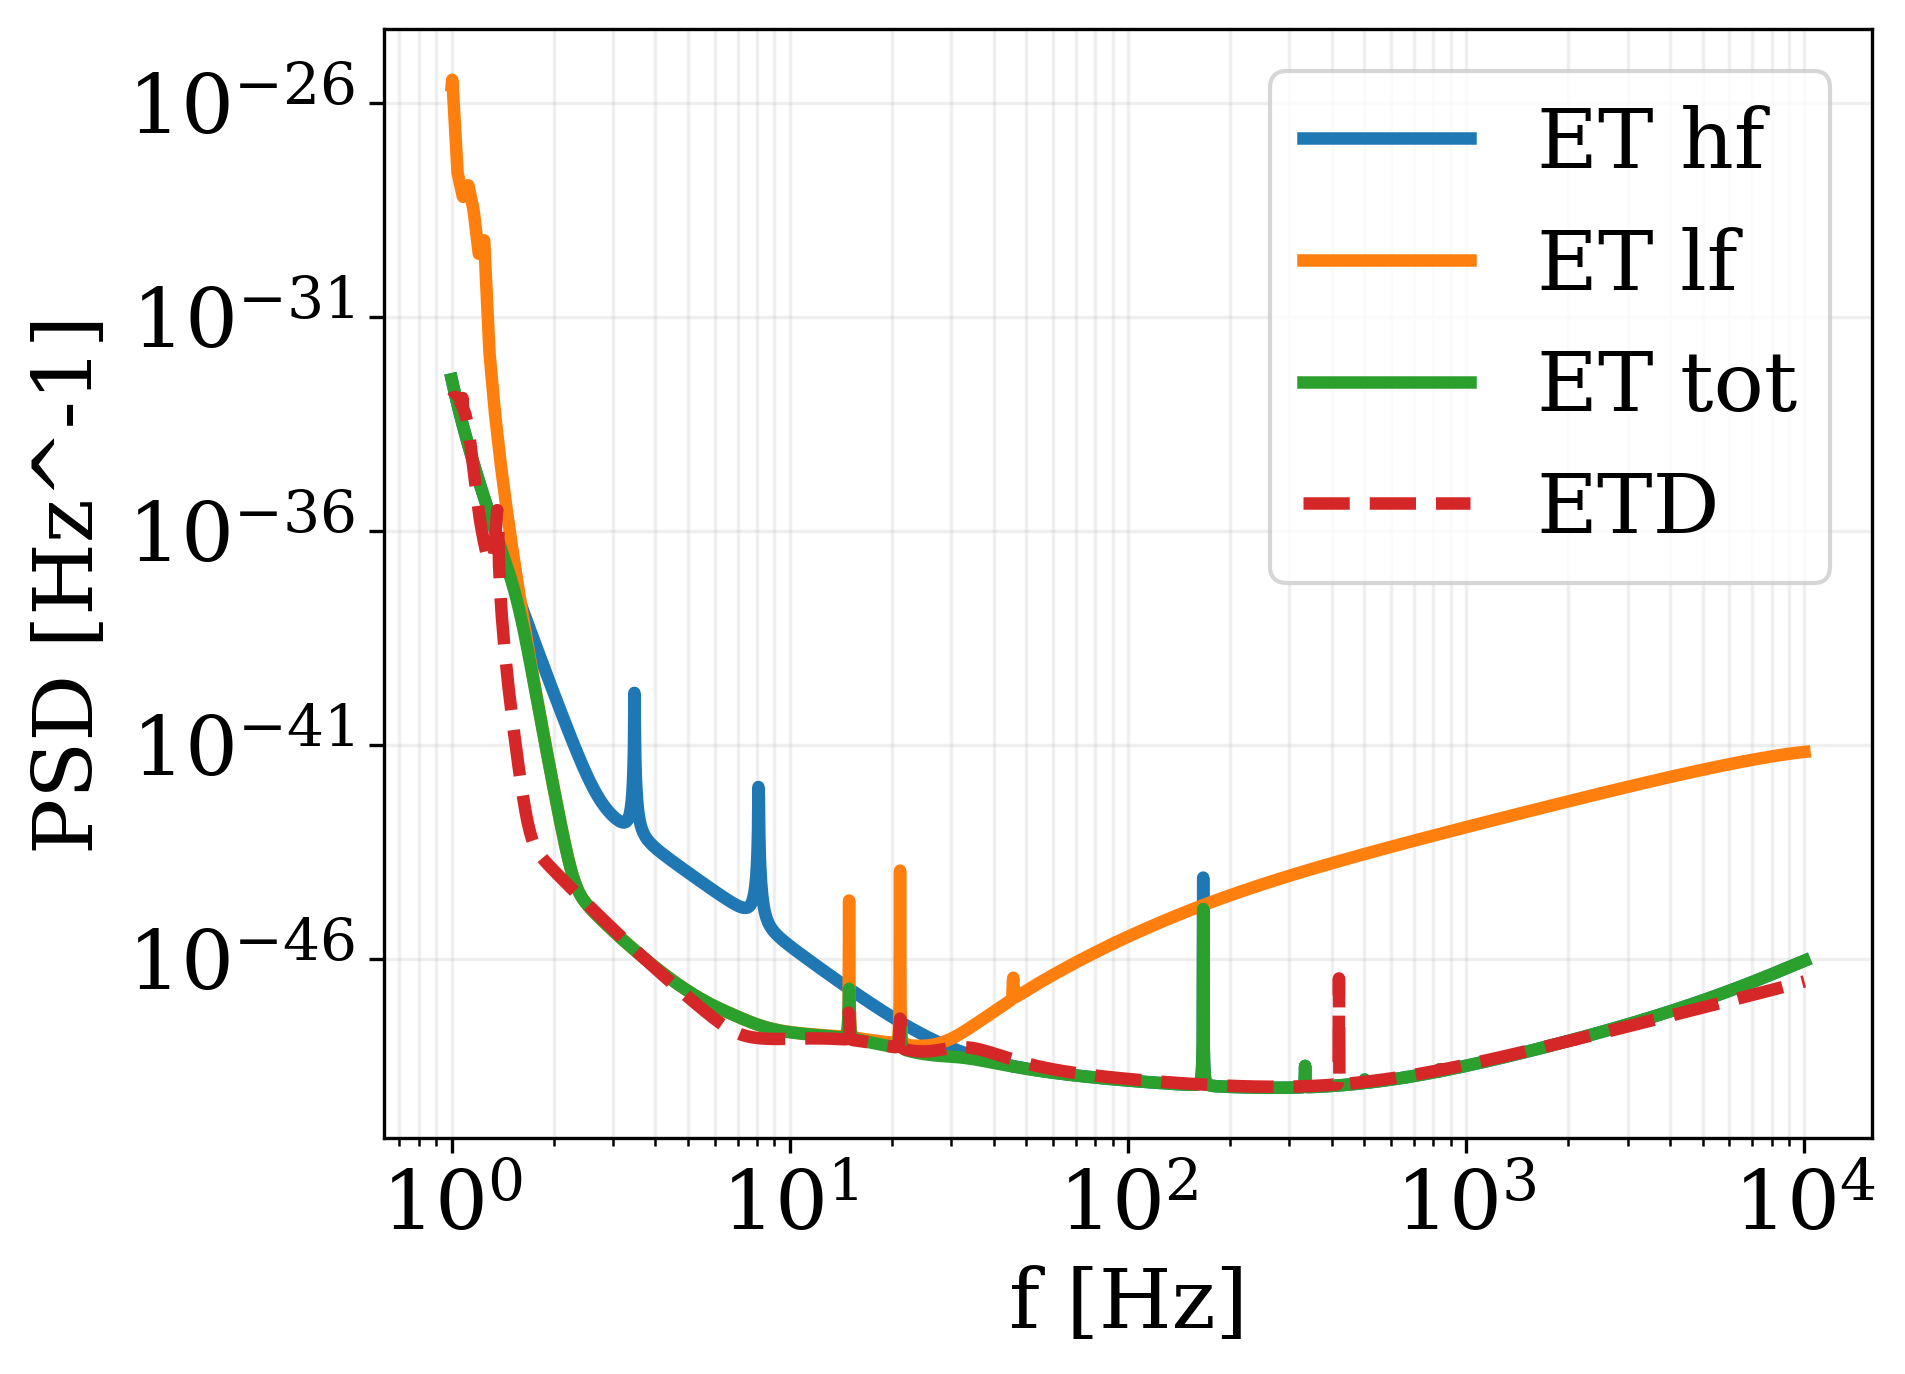

In [79]:
f_ref, psd_hf, psd_lf, psd_tot = np.loadtxt('psd/18213_ET10kmcolumns.txt', unpack=True)

f_etd, psd_etd = np.loadtxt('psd/et_d.txt', unpack=True)
psd_etd = psd_etd**2

plt.loglog(f_ref, psd_hf, label='ET hf')
plt.loglog(f_ref, psd_lf, label='ET lf')
plt.loglog(f_ref, psd_tot, label='ET tot')
plt.loglog(f_etd, psd_etd, label='ETD', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel('PSD [Hz^-1]')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.show()

psd_ref = psd_tot


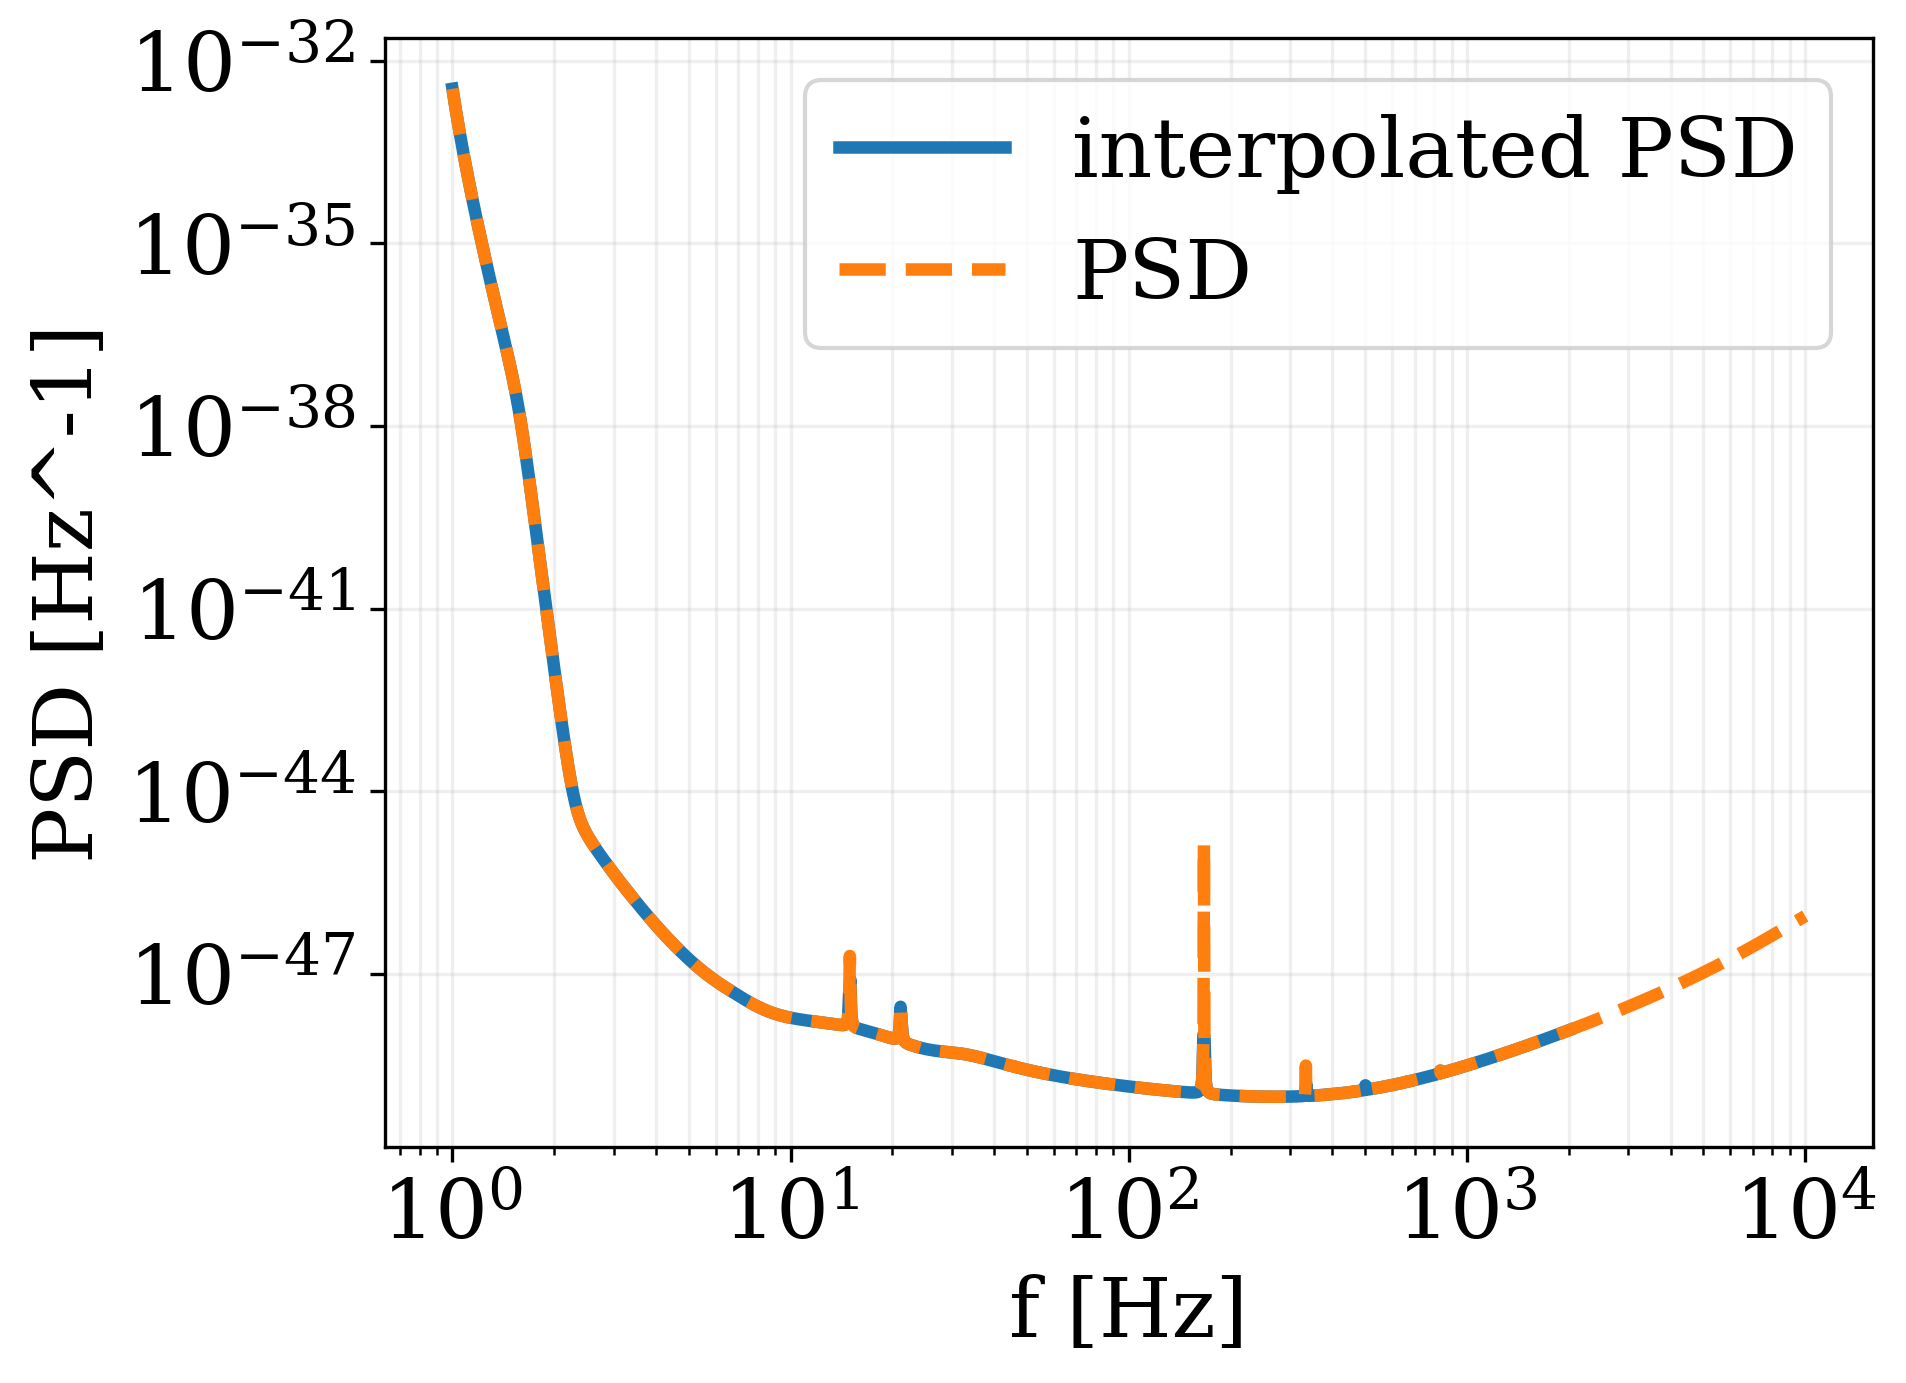

In [80]:
f = np.logspace(0, np.log10(2000), 1000)
orf_ET = 3/8 # lf limit

Pn = np.interp(f, f_ref,psd_ref)


plt.plot(f, Pn, label='interpolated PSD')
plt.plot(f_ref, psd_ref, label='PSD', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel('PSD [Hz^-1]')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.show()

(1e-13, 100.0)

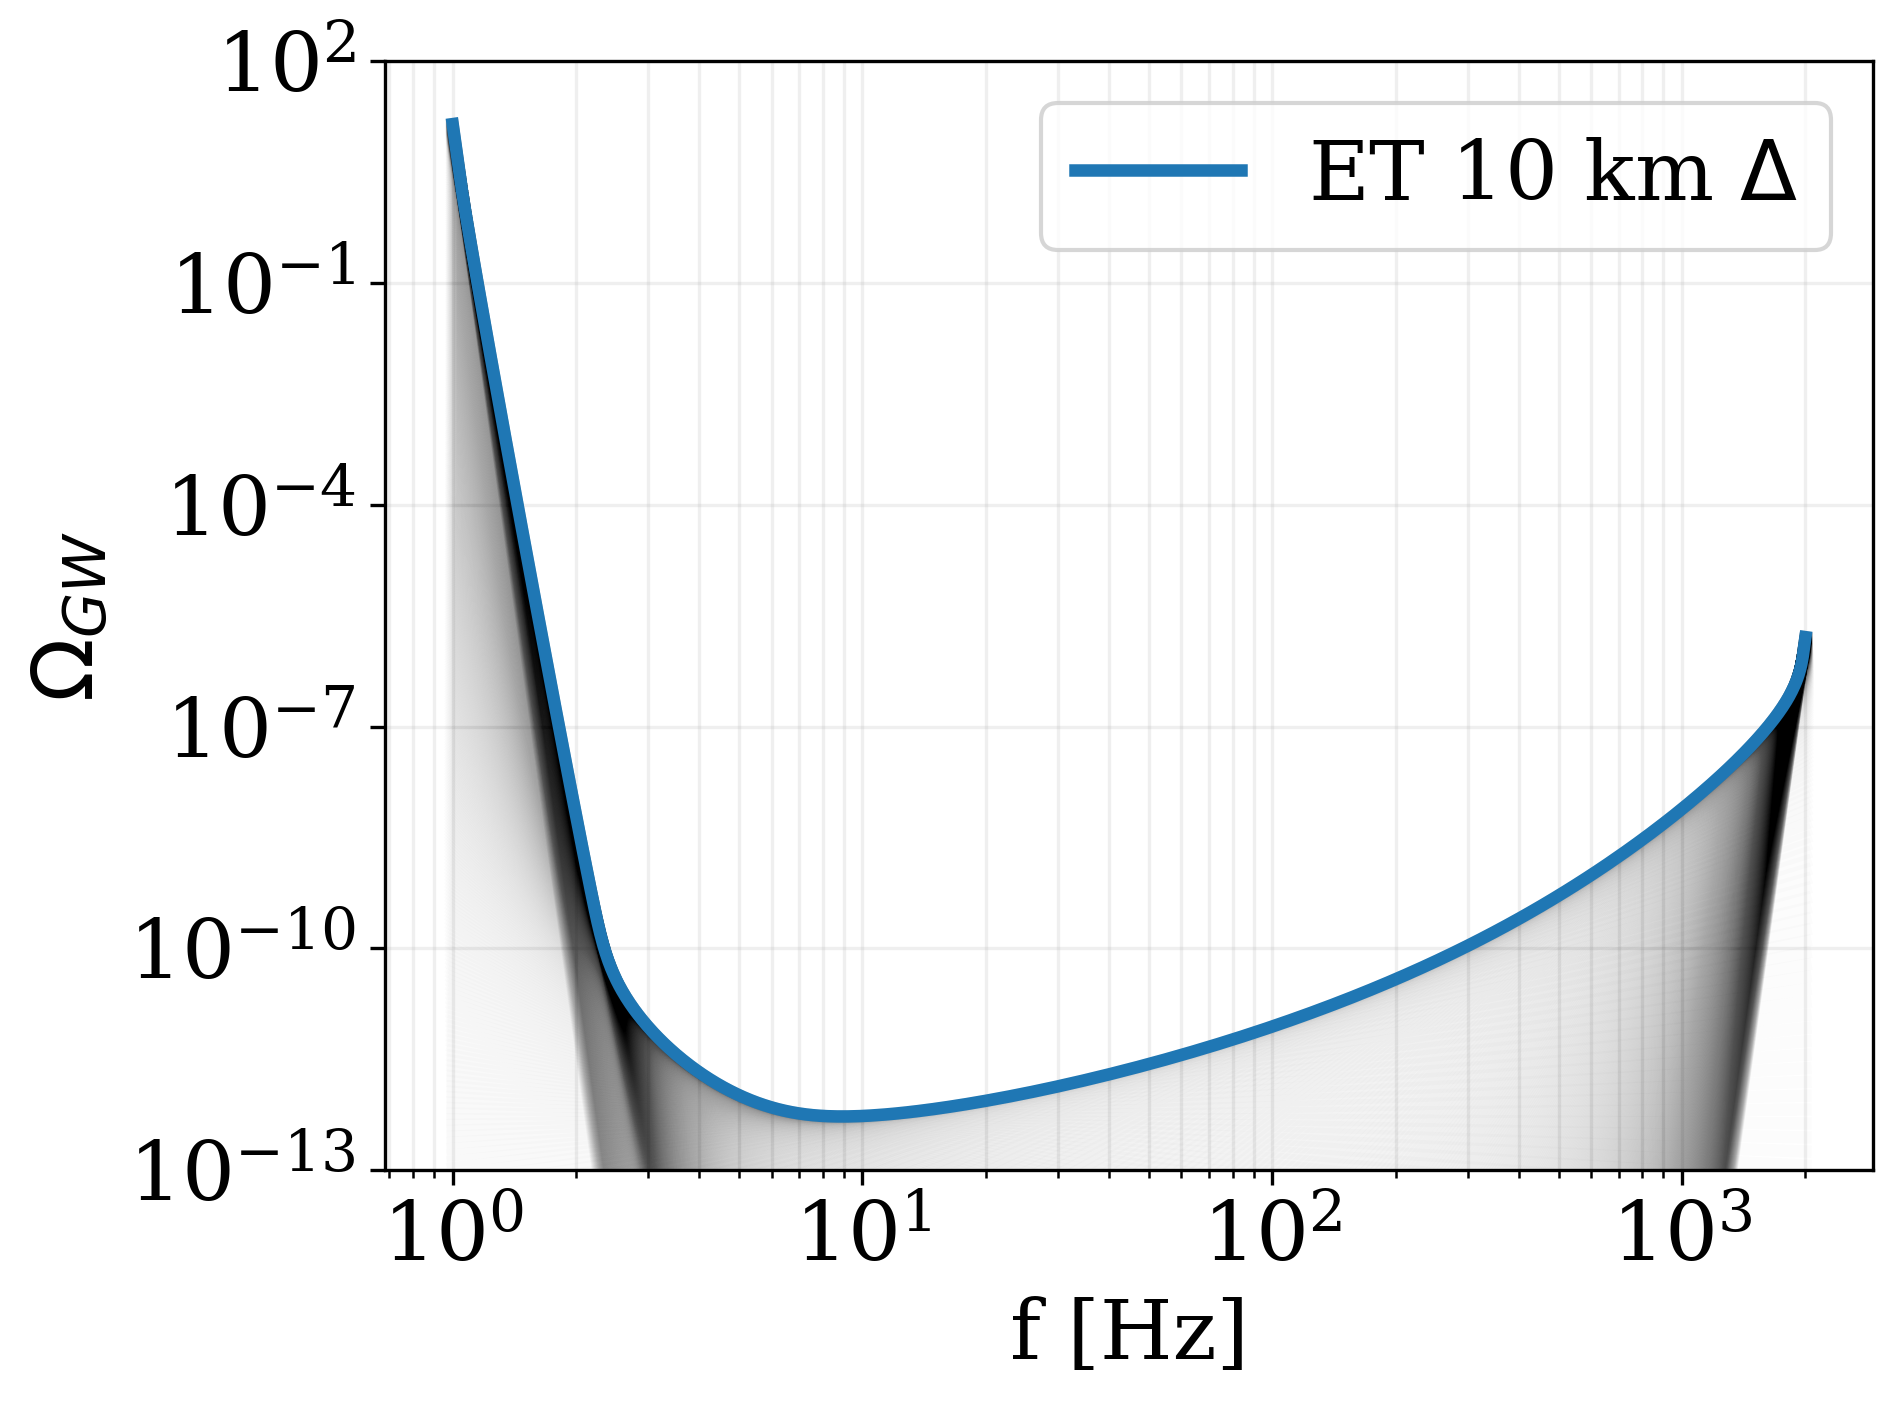

In [81]:
beta_min = -40
beta_max = 40
fref = 25
snr = 1
Tobs = 1

beta, Omega = all_Omega_GW(f, Pn, Pn, orf_ET, beta_min, beta_max, fref, snr, Tobs)

pls = np.zeros(len(f))

for i in range(len(f)):
    pls[i] = np.max(Omega[:,i])



for i in range(len(beta)):
    plt.loglog(f, Omega_GW(f, Pn, Pn, orf_ET, beta[i], fref, snr, Tobs) , alpha=0.01, color='black')
plt.loglog(f, pls, label=r'ET 10 km $\Delta$')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.ylim(1e-13, 1e2)


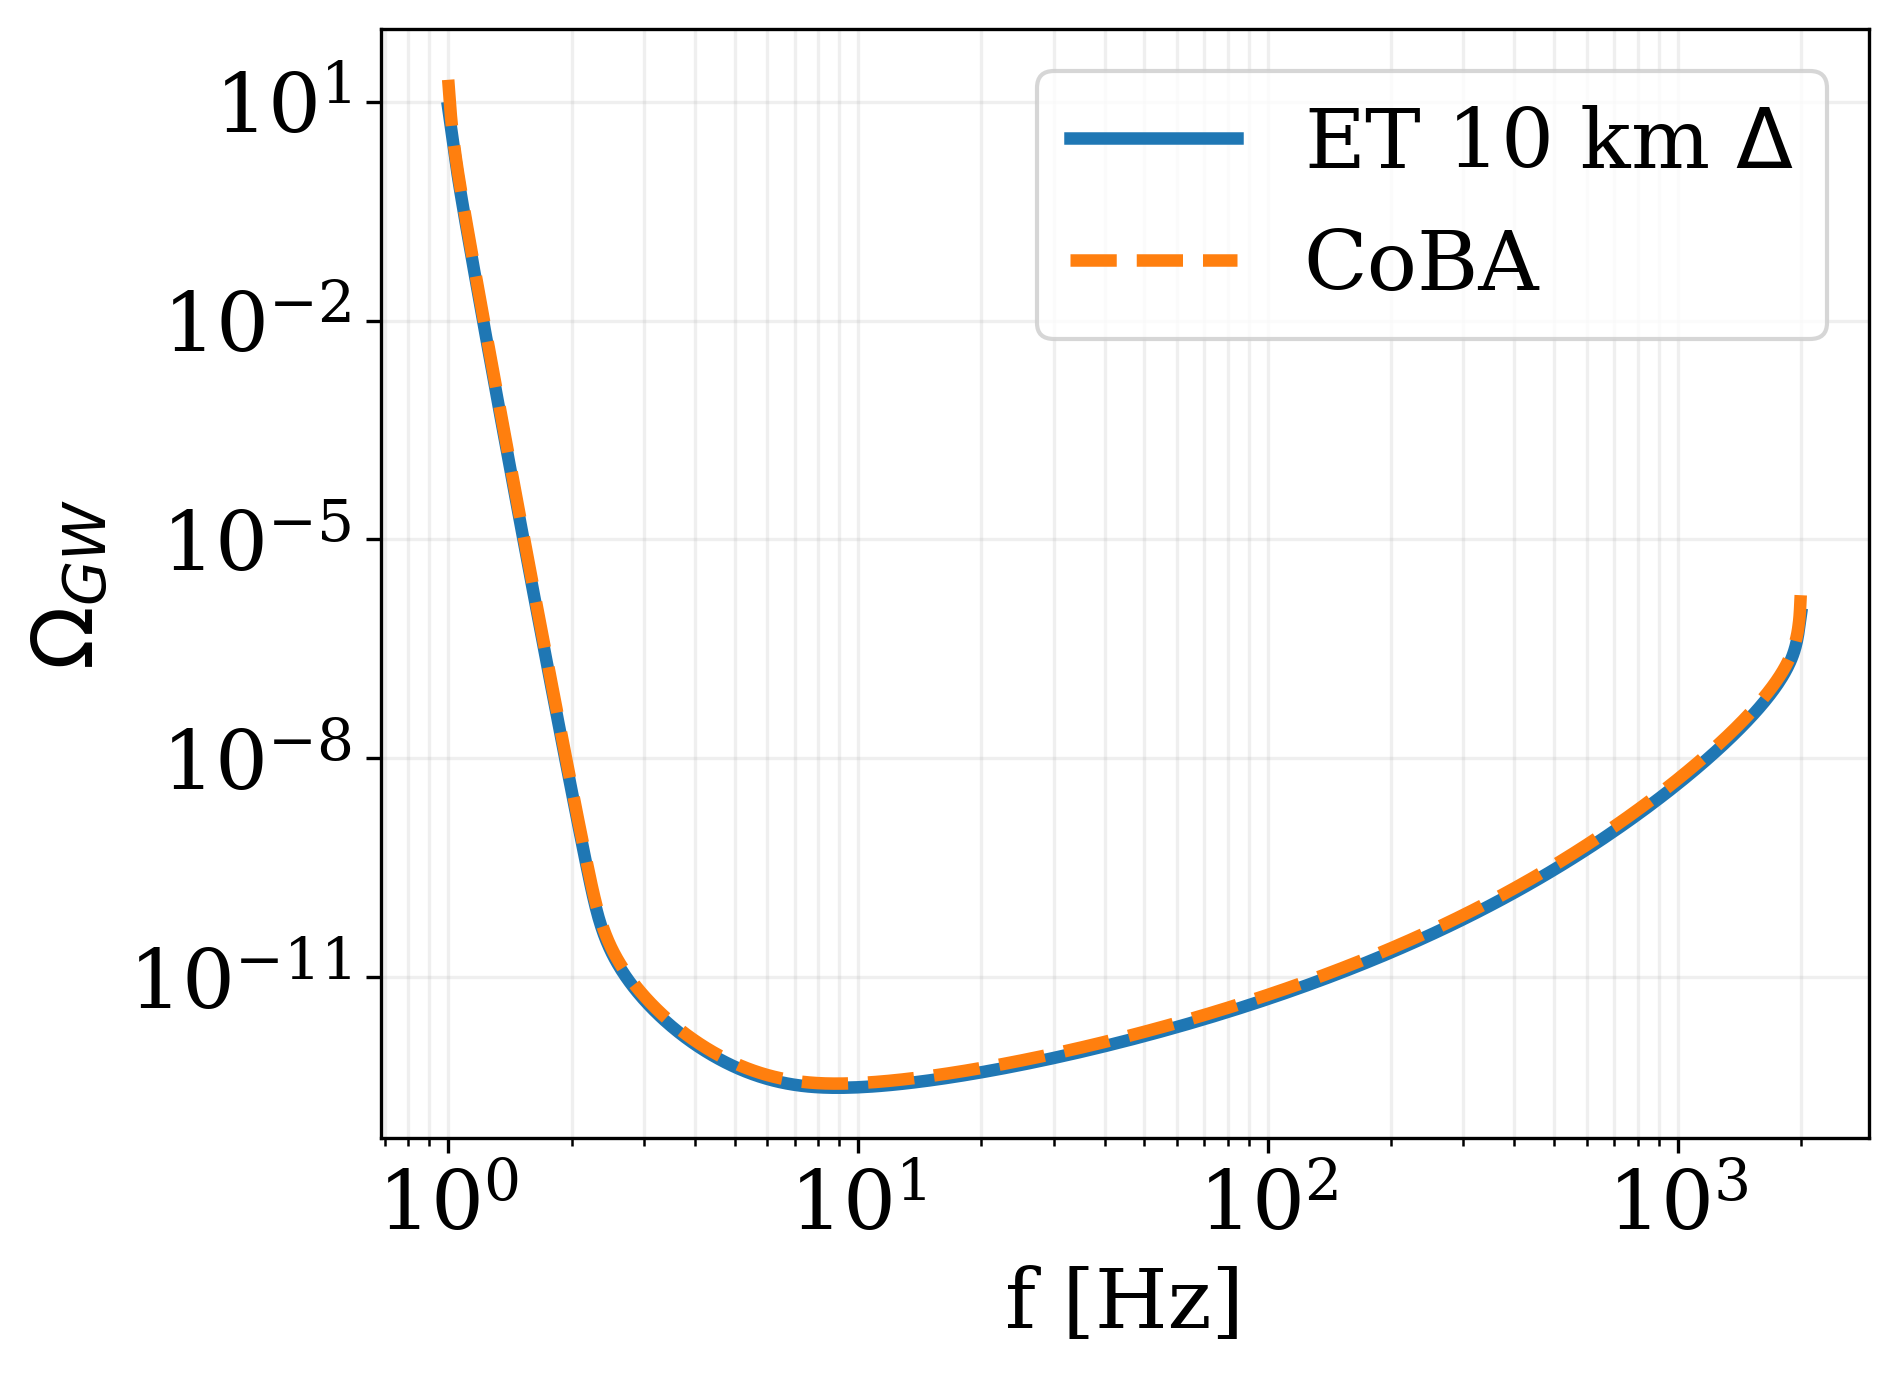

In [82]:
f_CoBA, PLS_CoBA = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_T_10km_HFLFcryo.txt', unpack=True)

plt.loglog(f, pls/np.sqrt(3), label=r'ET 10 km $\Delta$')
plt.loglog(f_CoBA, PLS_CoBA, label='CoBA', linestyle='--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')   
plt.show()



* ET 2L $\alpha=0^{\circ}$

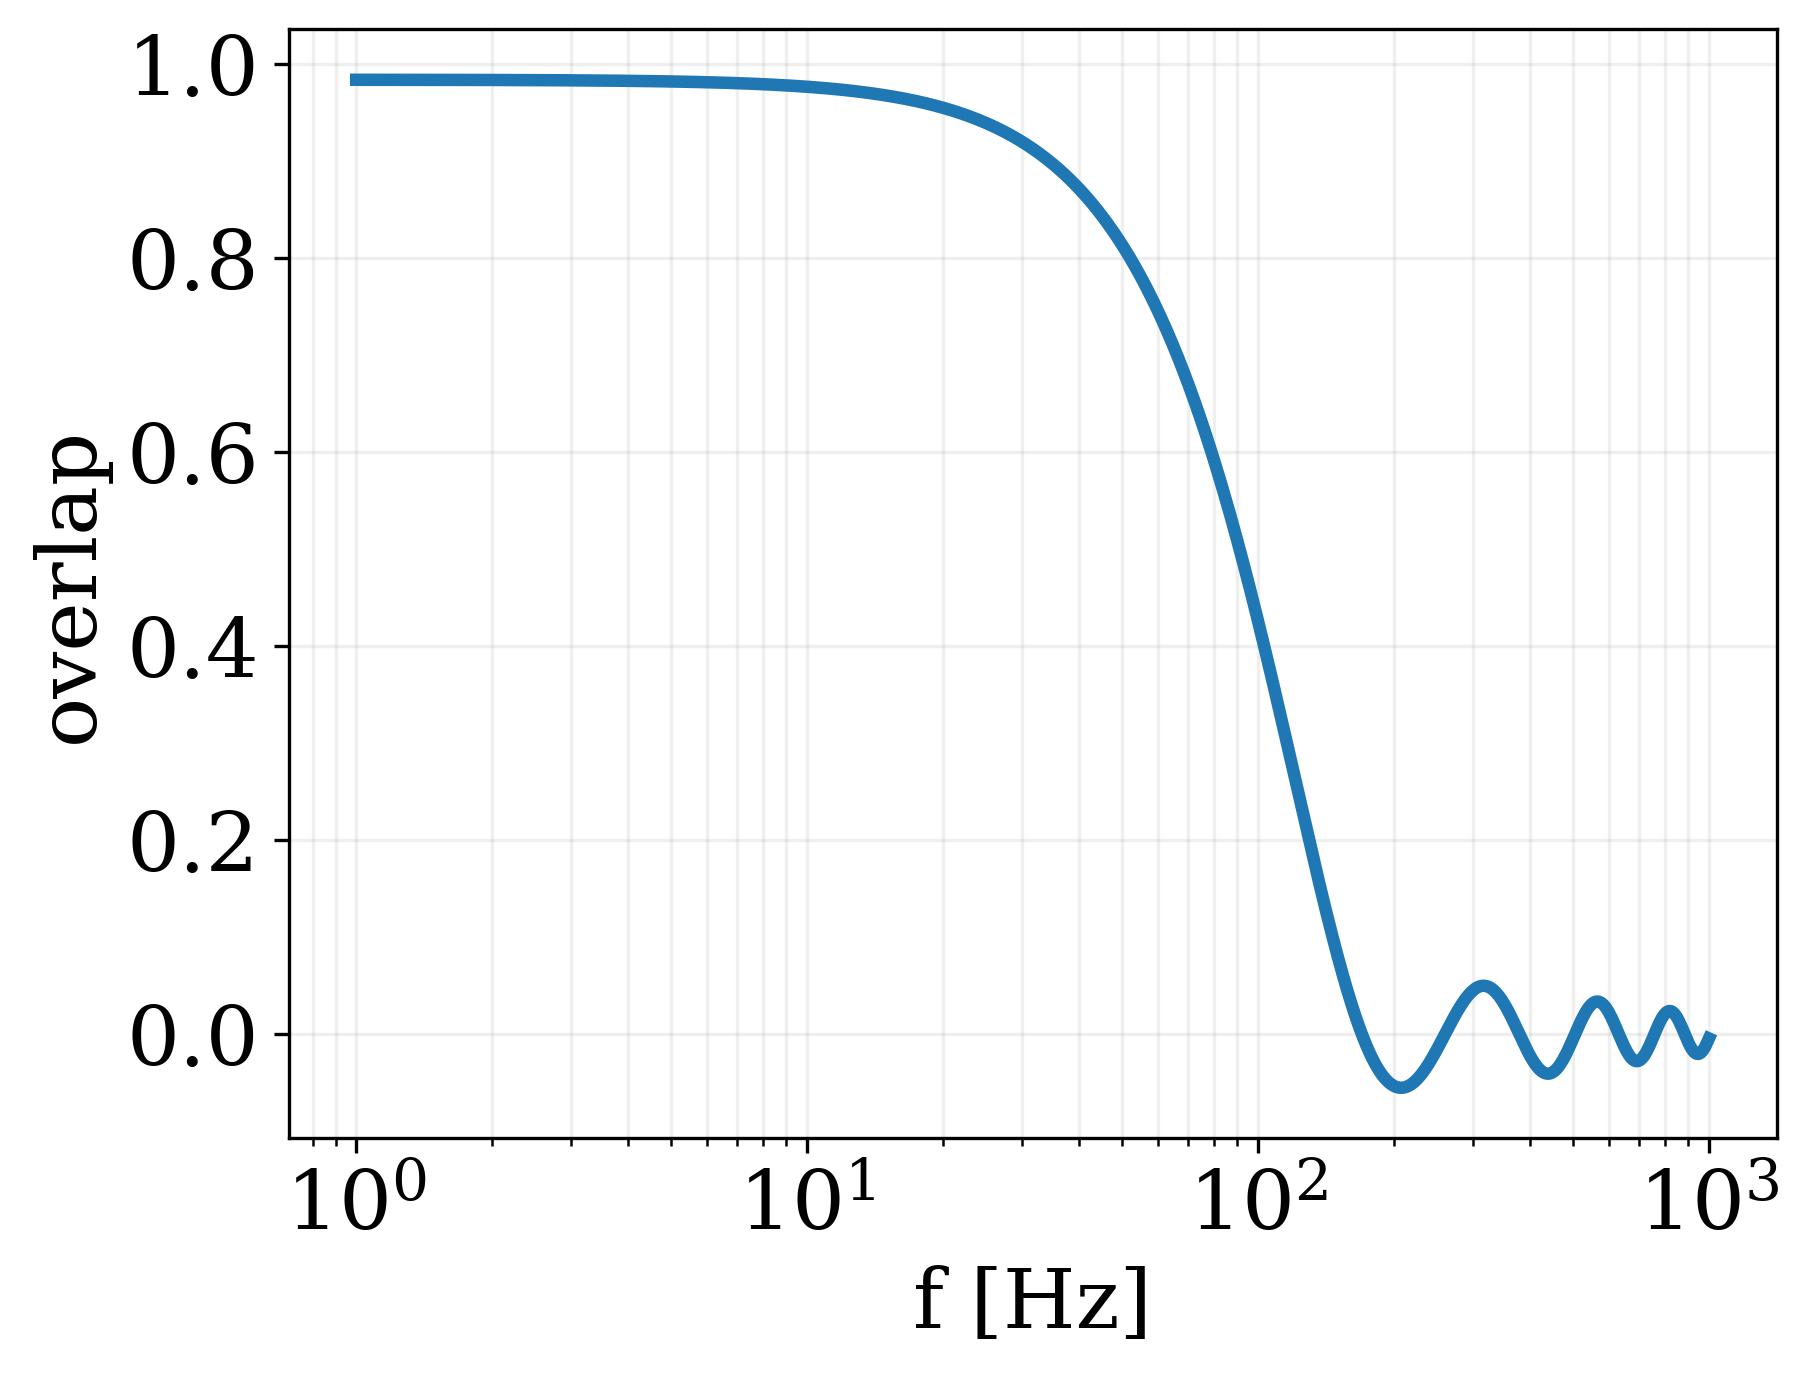

In [86]:
f = np.logspace(0, 3, 1000)
orf_ET = overlap.overlap('ET L1', 'ET L2', f, 0, 't', shift_angle=0 )

plt.semilogx(f, orf_ET)
plt.xlabel('f [Hz]')
plt.ylabel('overlap')
plt.grid(alpha=0.2, which='both')
plt.show()


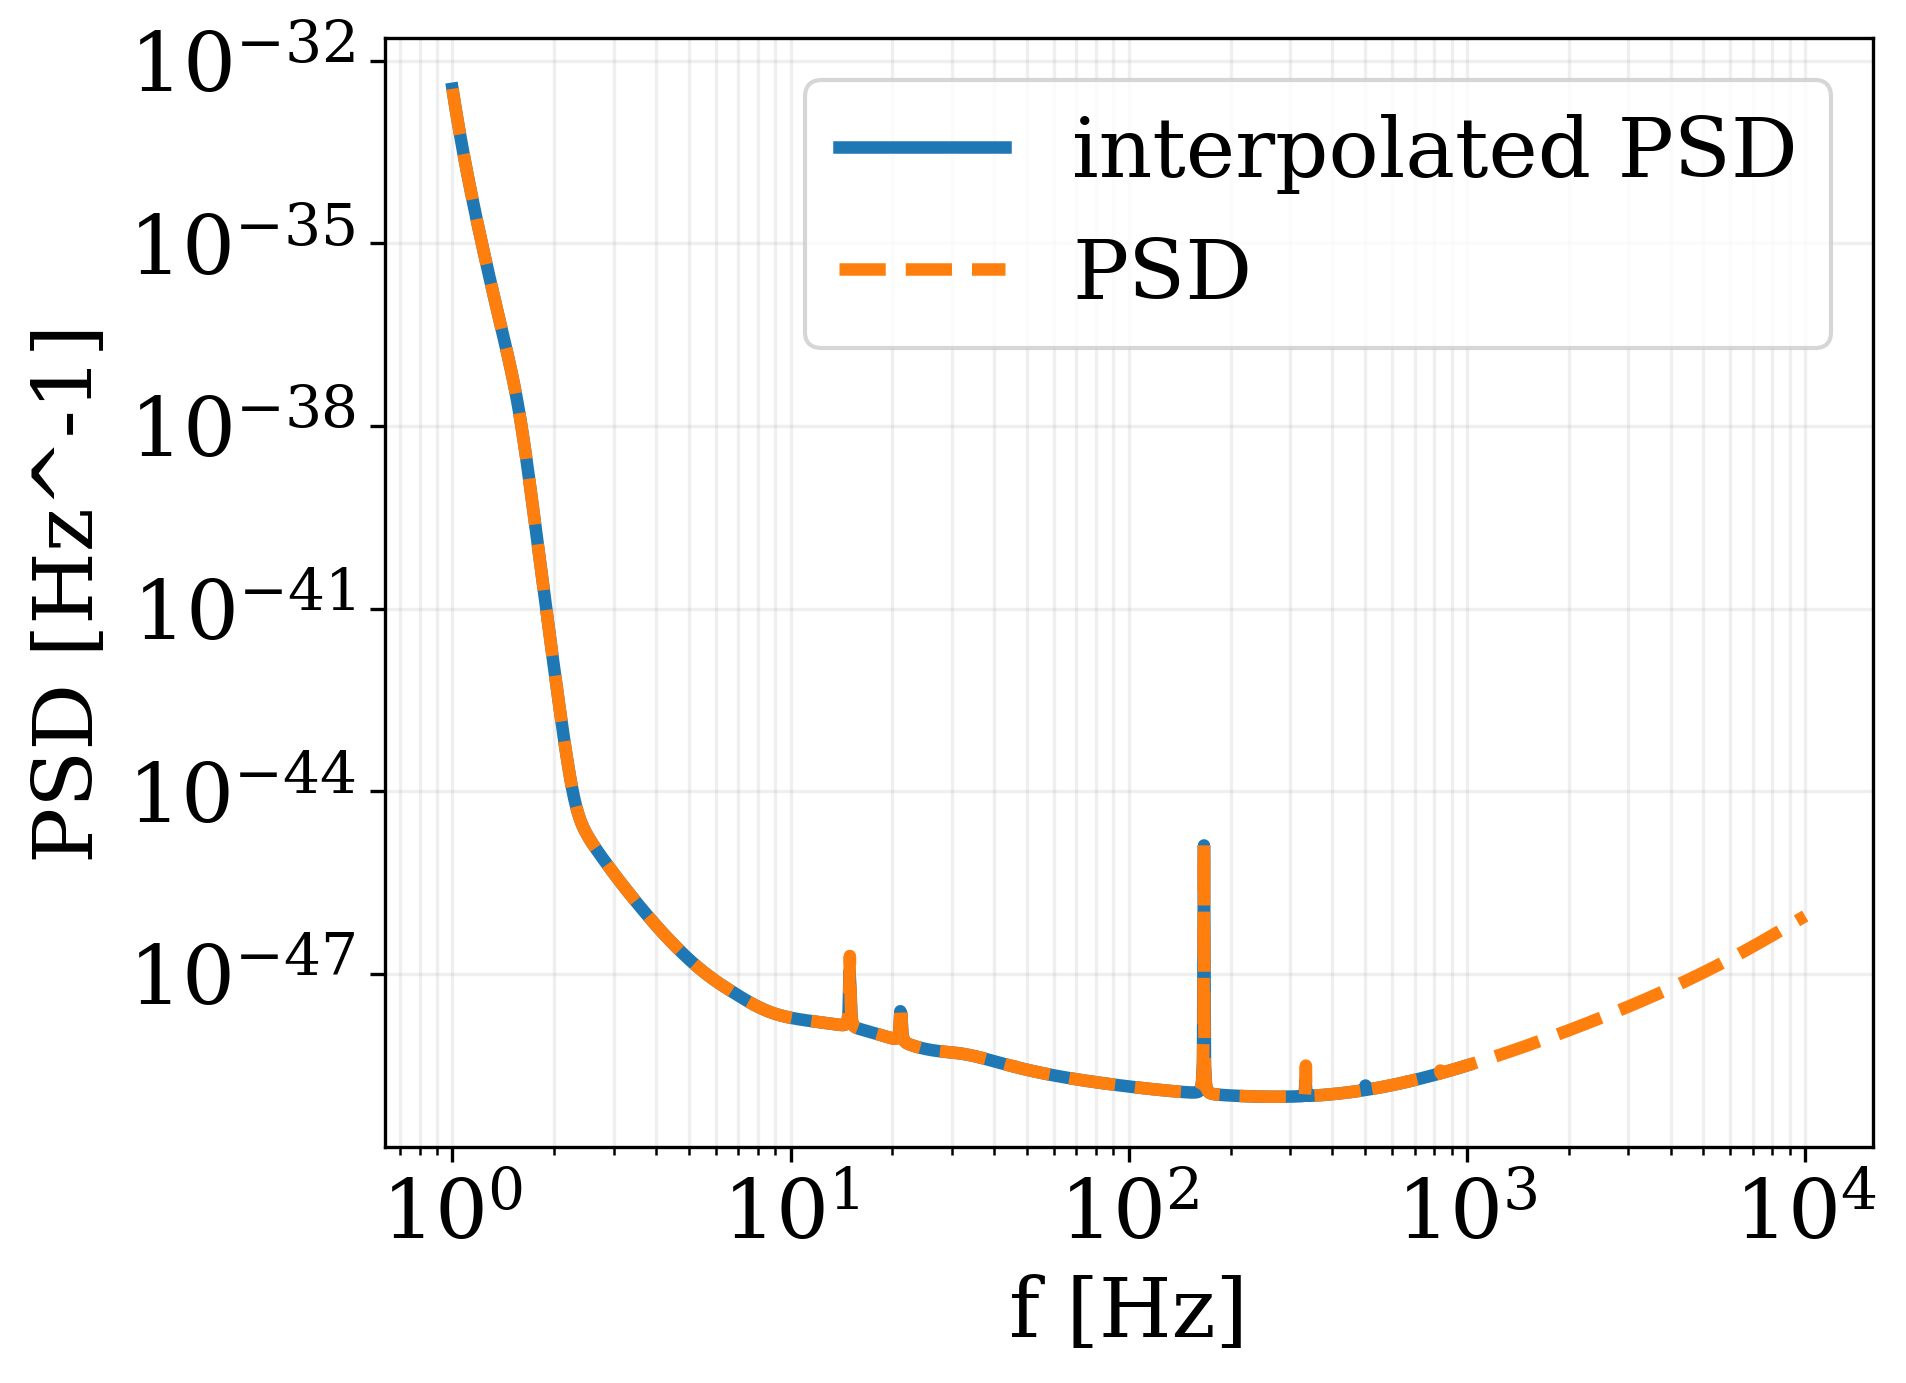

In [87]:
f_ref, psd_hf, psd_lf, psd_tot = np.loadtxt('psd/18213_ET15kmcolumns.txt', unpack=True)
Pn = np.interp(f, f_ref,psd_ref)


plt.plot(f, Pn, label='interpolated PSD')
plt.plot(f_ref, psd_ref, label='PSD', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel('PSD [Hz^-1]')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.show()

(1e-13, 100.0)

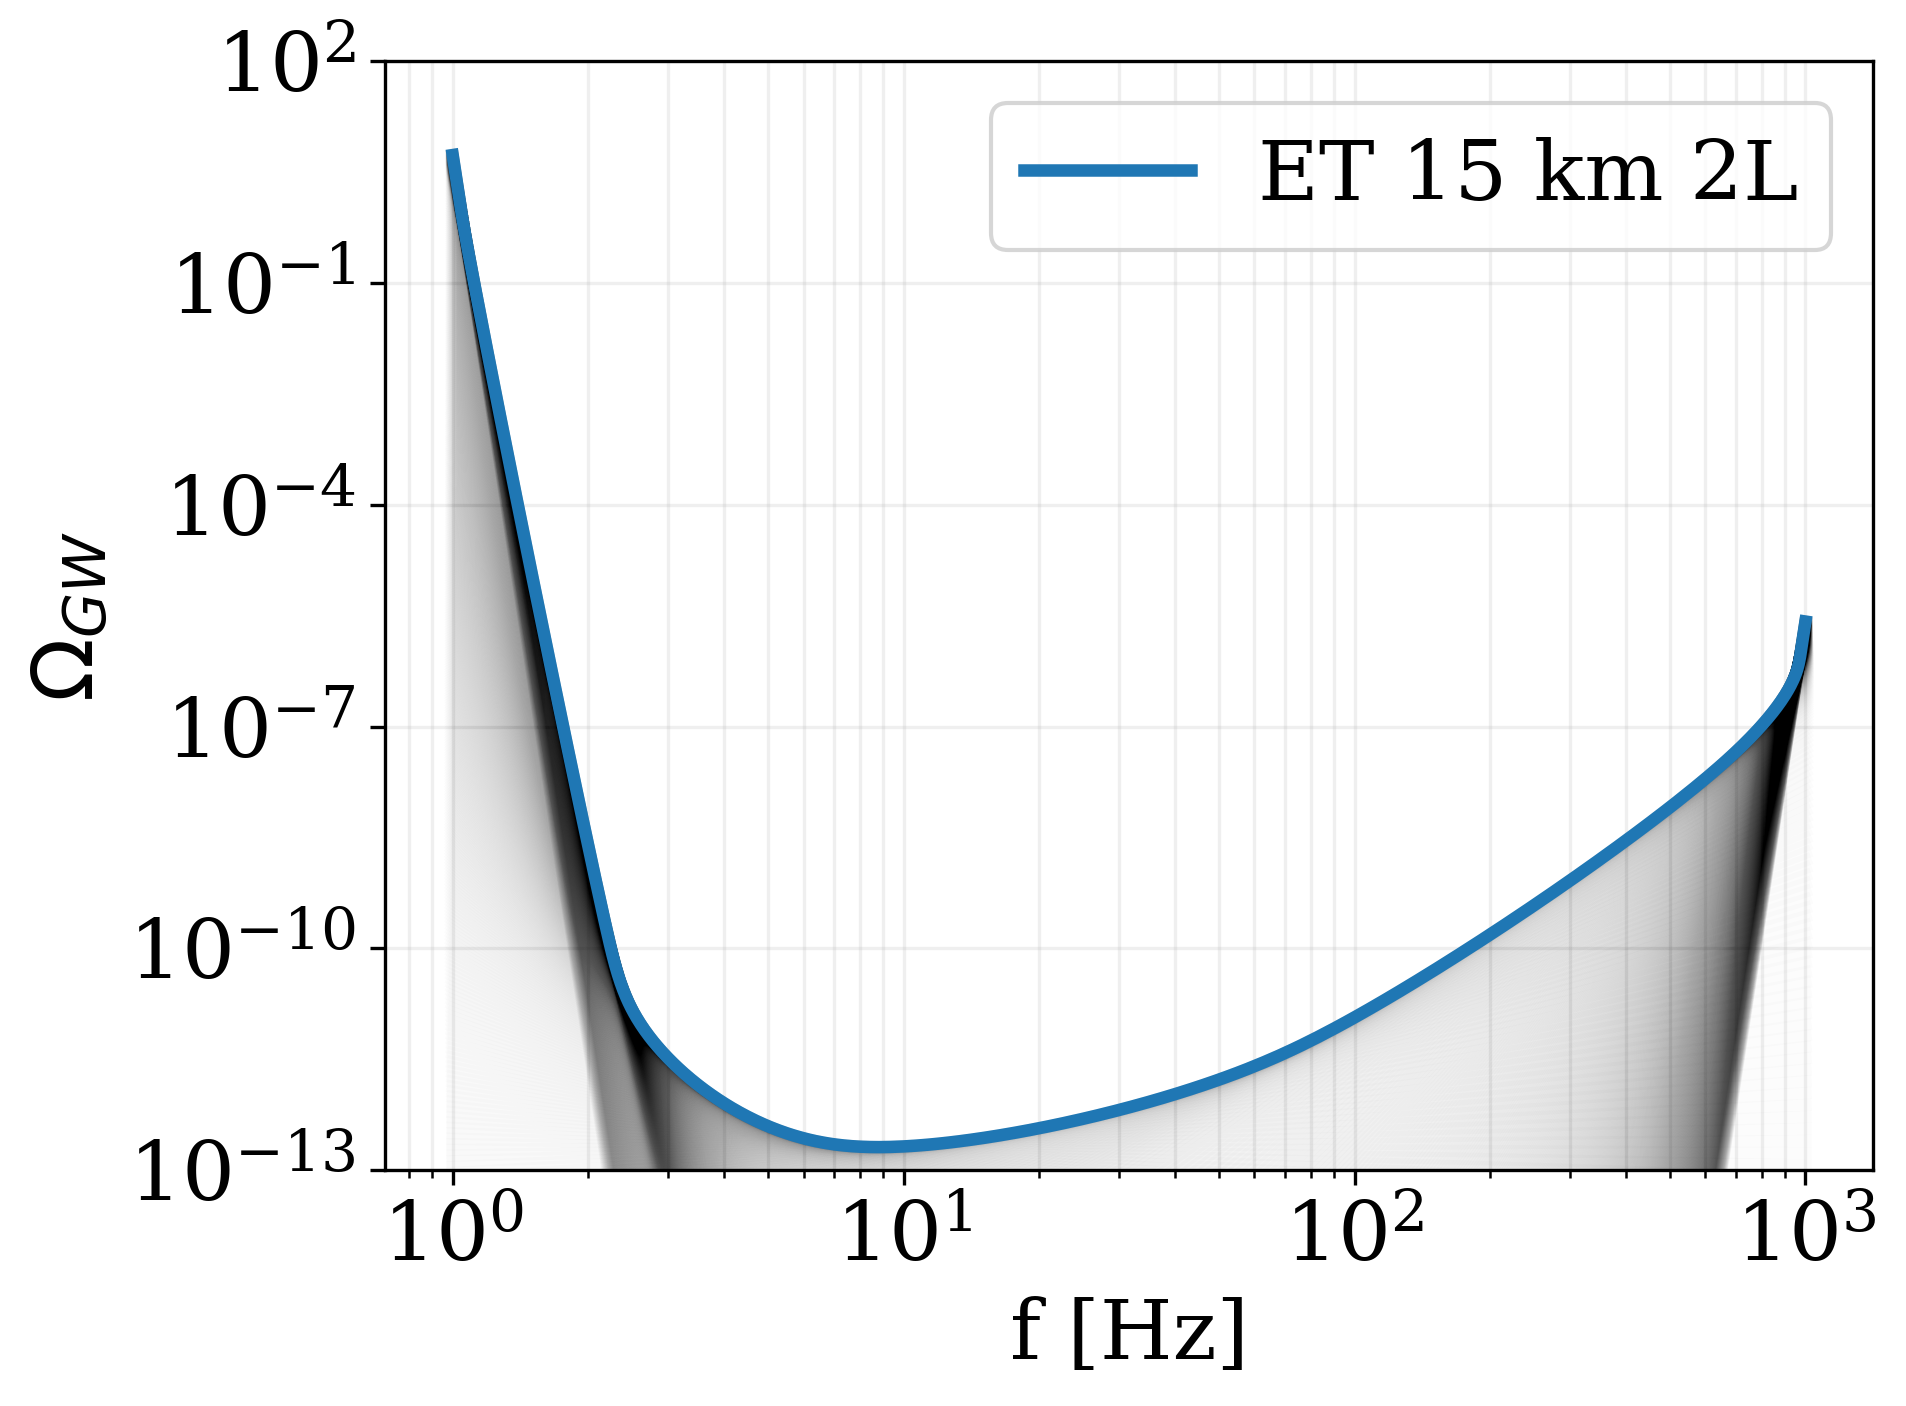

In [92]:
beta_min = -40
beta_max = 40
fref = 100
snr = 1
Tobs = 1

beta, Omega = all_Omega_GW(f, Pn, Pn, orf_ET, beta_min, beta_max, fref, snr, Tobs)

pls = np.zeros(len(f))

for i in range(len(f)):
    pls[i] = np.max(Omega[:,i])



for i in range(len(beta)):
    plt.loglog(f, Omega_GW(f, Pn, Pn, orf_ET, beta[i], fref, snr, Tobs) , alpha=0.01, color='black')
plt.loglog(f, pls, label=r'ET 15 km 2L')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.ylim(1e-13, 1e2)

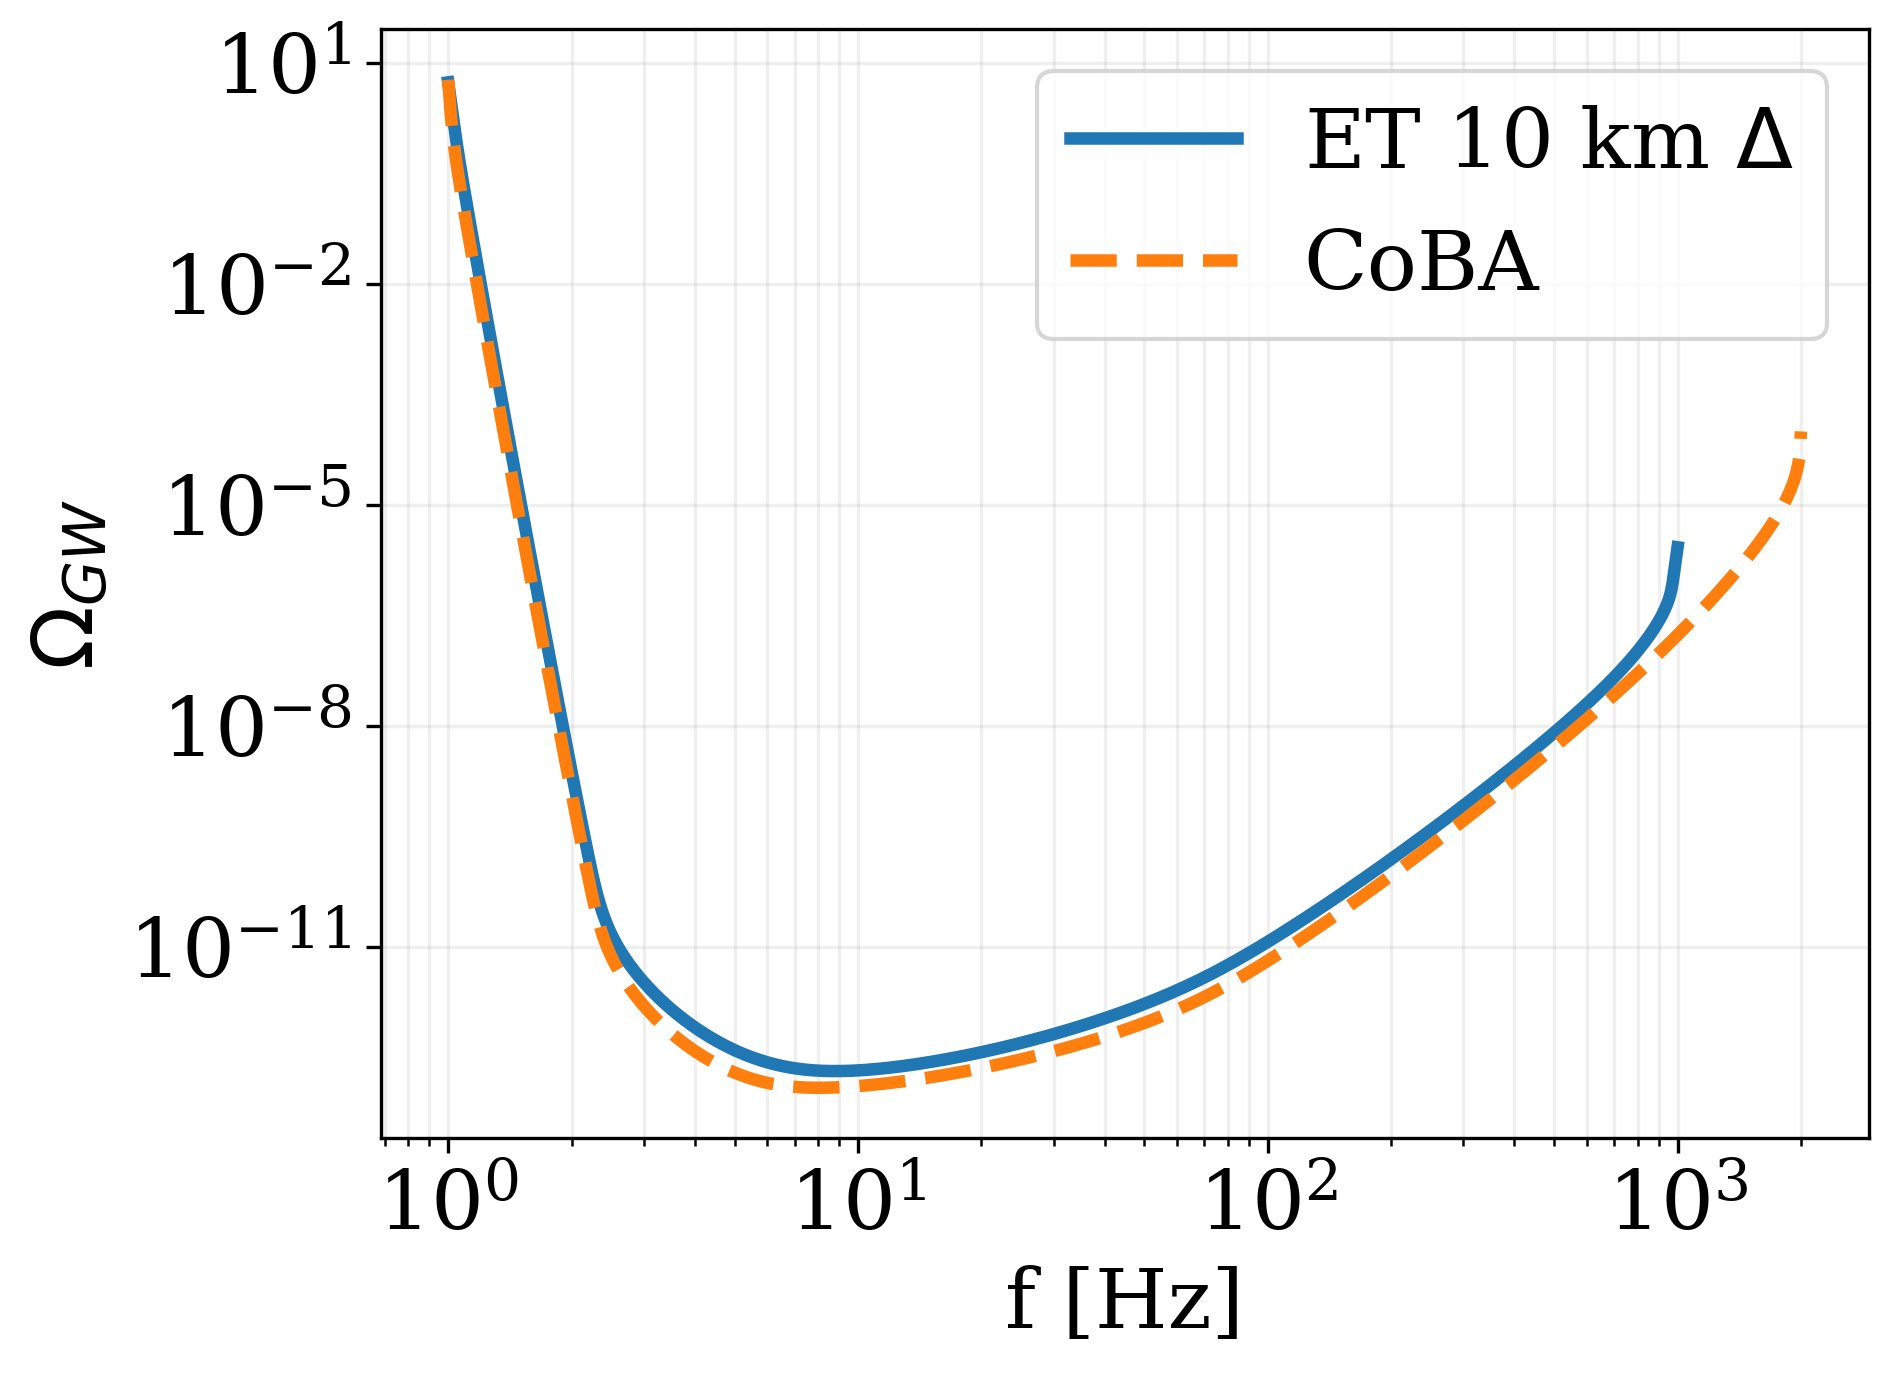

In [93]:
f_CoBA, PLS_CoBA = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L0deg_15km_HFLFcryo.txt', unpack=True)

plt.loglog(f, pls, label=r'ET 10 km $\Delta$')
plt.loglog(f_CoBA, PLS_CoBA, label='CoBA', linestyle='--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.grid(alpha=0.2, which='both')   
plt.show()